In [1]:
# libraries for Web Scrapping
import requests
from bs4 import BeautifulSoup

# library for advance string manipulation
import string

# library for data manipulation
import pandas as pd

# library for advance mathematical operations
import numpy as np

# library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file

In [2]:
# reading the csv file
df_corona = pd.read_csv('covid May-03-2020 18-58-05.csv')

In [3]:
# getting a quick info of the features
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
Country             214 non-null object
TotalCases          214 non-null object
NewCases            214 non-null object
TotalDeaths         214 non-null object
NewDeaths           214 non-null float64
TotalRecovered      214 non-null object
ActiveCases         214 non-null object
Serious,Critical    214 non-null object
TotCases/1M pop     214 non-null object
Deaths/1M pop       214 non-null object
TotalTests          214 non-null object
Tests/1M pop        214 non-null object
Continent           214 non-null object
dtypes: float64(1), object(12)
memory usage: 21.9+ KB


In [4]:
# all the features are in string format. So, to clean them we will convert the datatype  of the column NewDeaths to string
df_corona['NewDeaths'] = df_corona['NewDeaths'].astype(str)

In [5]:
# replacing the ',' and the '+' in the values with an empty string
# stripping out the whitespace from the values 
for column in df_corona:
    df_corona[column] = df_corona[column].str.replace(',','')
    df_corona[column] = df_corona[column].str.replace('+','')
    df_corona[column] = df_corona[column].str.strip()
    
df_corona

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Continent
0,USA,1162049,1275,67492,48.0,173910,920647,16475,3511,204,6937747,20960,North America
1,Spain,245567,0,25100,0.0,146233,74234,2386,5252,537,1528833,32699,Europe
2,Italy,209328,0,28710,0.0,79914,100704,1539,3462,475,2108837,34879,Europe
3,UK,182260,0,28131,0.0,0,153785,1559,2685,414,1129907,16644,Europe
4,France,168396,0,24760,0.0,50562,93074,3827,2580,379,1100228,16856,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,6,0,,0.0,5,1,0,10,0,0,0,Africa
210,Anguilla,3,0,,0.0,3,0,0,200,0,0,0,North America
211,Comoros,3,0,,0.0,0,3,0,3,0,0,0,Africa
212,Saint Pierre Miquelon,1,0,,0.0,0,1,0,173,0,0,0,North America


In [6]:
# creating a list of the columns
columns_to_convert = ['TotalCases', 'NewCases', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'TotCases/1M pop',
       'Deaths/1M pop', 'TotalTests', 'Tests/1M pop']

# after cleaning, converting the datatype of the columns to float
for column in columns_to_convert:
    df_corona[column] = df_corona[column].astype(float)

In [7]:
# we are not able to convert the column 'TotalDeaths' to float because there is a blank string value in that column
# we are forcing the column to convert into numeric form
# errors='coerce' converts the inconvertable values to NaN
df_corona.TotalDeaths = pd.to_numeric(df_corona.TotalDeaths, errors='coerce')

In [8]:
df_corona

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Continent
0,USA,1162049.0,1275.0,67492.0,48.0,173910.0,920647.0,16475.0,3511.0,204.0,6937747.0,20960.0,North America
1,Spain,245567.0,0.0,25100.0,0.0,146233.0,74234.0,2386.0,5252.0,537.0,1528833.0,32699.0,Europe
2,Italy,209328.0,0.0,28710.0,0.0,79914.0,100704.0,1539.0,3462.0,475.0,2108837.0,34879.0,Europe
3,UK,182260.0,0.0,28131.0,0.0,0.0,153785.0,1559.0,2685.0,414.0,1129907.0,16644.0,Europe
4,France,168396.0,0.0,24760.0,0.0,50562.0,93074.0,3827.0,2580.0,379.0,1100228.0,16856.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,6.0,0.0,NaN,0.0,5.0,1.0,0.0,10.0,0.0,0.0,0.0,Africa
210,Anguilla,3.0,0.0,NaN,0.0,3.0,0.0,0.0,200.0,0.0,0.0,0.0,North America
211,Comoros,3.0,0.0,NaN,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,Africa
212,Saint Pierre Miquelon,1.0,0.0,NaN,0.0,0.0,1.0,0.0,173.0,0.0,0.0,0.0,North America


In [9]:
# replacing the null values in the column 'TotalDeaths' with 0
df_corona['TotalDeaths'] = df_corona['TotalDeaths'].replace(np.nan,0)
df_corona

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Continent
0,USA,1162049.0,1275.0,67492.0,48.0,173910.0,920647.0,16475.0,3511.0,204.0,6937747.0,20960.0,North America
1,Spain,245567.0,0.0,25100.0,0.0,146233.0,74234.0,2386.0,5252.0,537.0,1528833.0,32699.0,Europe
2,Italy,209328.0,0.0,28710.0,0.0,79914.0,100704.0,1539.0,3462.0,475.0,2108837.0,34879.0,Europe
3,UK,182260.0,0.0,28131.0,0.0,0.0,153785.0,1559.0,2685.0,414.0,1129907.0,16644.0,Europe
4,France,168396.0,0.0,24760.0,0.0,50562.0,93074.0,3827.0,2580.0,379.0,1100228.0,16856.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,6.0,0.0,0.0,0.0,5.0,1.0,0.0,10.0,0.0,0.0,0.0,Africa
210,Anguilla,3.0,0.0,0.0,0.0,3.0,0.0,0.0,200.0,0.0,0.0,0.0,North America
211,Comoros,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,Africa
212,Saint Pierre Miquelon,1.0,0.0,0.0,0.0,0.0,1.0,0.0,173.0,0.0,0.0,0.0,North America


# Now, df_corona is ready for EDA

In [10]:
# presetting the size of the images
plt.rcParams['figure.figsize'] = 16, 8

In [11]:
# sorting the  dataframe in the descending order according to the TotalCases  
df_corona = df_corona.sort_values('TotalCases', ascending=False)
df_corona

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Continent
0,USA,1162049.0,1275.0,67492.0,48.0,173910.0,920647.0,16475.0,3511.0,204.0,6937747.0,20960.0,North America
1,Spain,245567.0,0.0,25100.0,0.0,146233.0,74234.0,2386.0,5252.0,537.0,1528833.0,32699.0,Europe
2,Italy,209328.0,0.0,28710.0,0.0,79914.0,100704.0,1539.0,3462.0,475.0,2108837.0,34879.0,Europe
3,UK,182260.0,0.0,28131.0,0.0,0.0,153785.0,1559.0,2685.0,414.0,1129907.0,16644.0,Europe
4,France,168396.0,0.0,24760.0,0.0,50562.0,93074.0,3827.0,2580.0,379.0,1100228.0,16856.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,St. Barth,6.0,0.0,0.0,0.0,6.0,0.0,0.0,607.0,0.0,0.0,0.0,North America
209,Western Sahara,6.0,0.0,0.0,0.0,5.0,1.0,0.0,10.0,0.0,0.0,0.0,Africa
210,Anguilla,3.0,0.0,0.0,0.0,3.0,0.0,0.0,200.0,0.0,0.0,0.0,North America
211,Comoros,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,Africa


## Creating a barplot for the top 10 `Countries` and the `Total Cases` for each country 

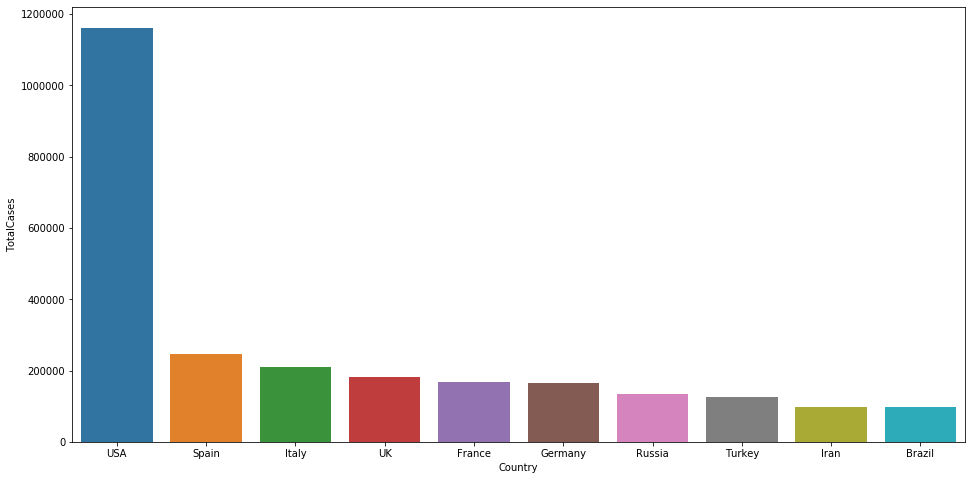

In [12]:
sns.barplot(x=df_corona.Country[:10], y=df_corona.TotalCases[:10])

**Interpretation:** `USA` has the highest number of cases in the world i.e. around `1200000`

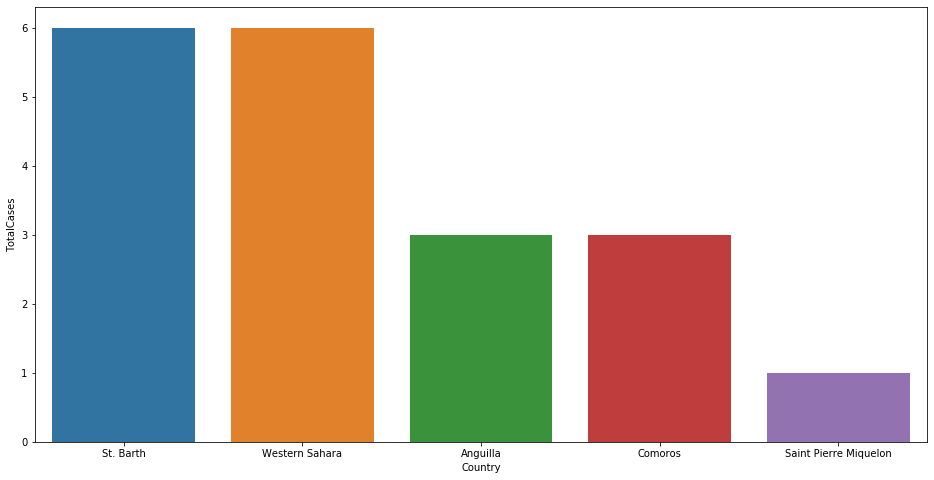

In [13]:
sns.barplot(x=df_corona.Country[-5:], y=df_corona.TotalCases[-5:])

**Interpretation:** `Saint Pierre Miquelon` has the least number of cases in the world i.e. `1`

## A barplot for the top 10 `Countries` and the `Total Deaths` in each country 

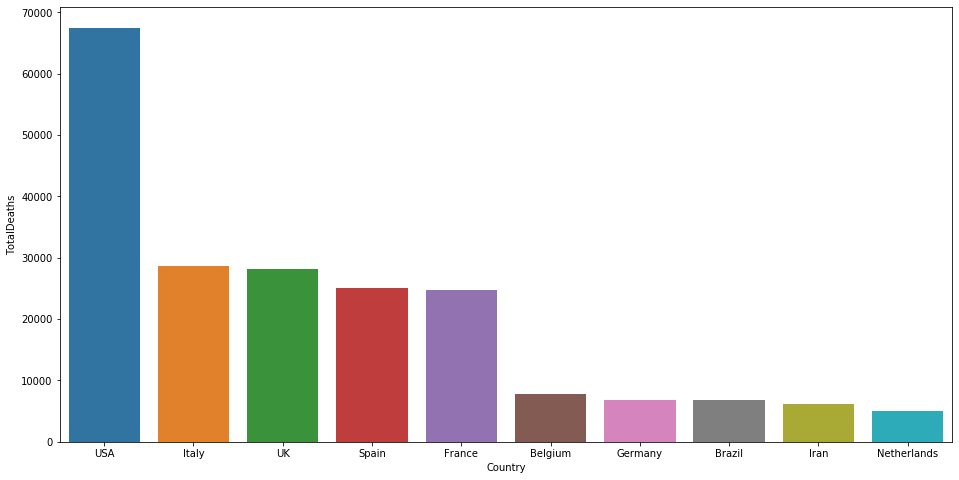

In [14]:
# sorting the  dataframe in the descending order according to the TotalDeaths  
df_corona = df_corona.sort_values('TotalDeaths', ascending=False)
sns.barplot(x=df_corona.Country[:10], y=df_corona.TotalDeaths[:10])

**Interpretation:** `USA` has the highest number of deaths in the world i.e. around `70000`

## A barplot for the top 10 `Countries` and the `Active Cases` in each country 

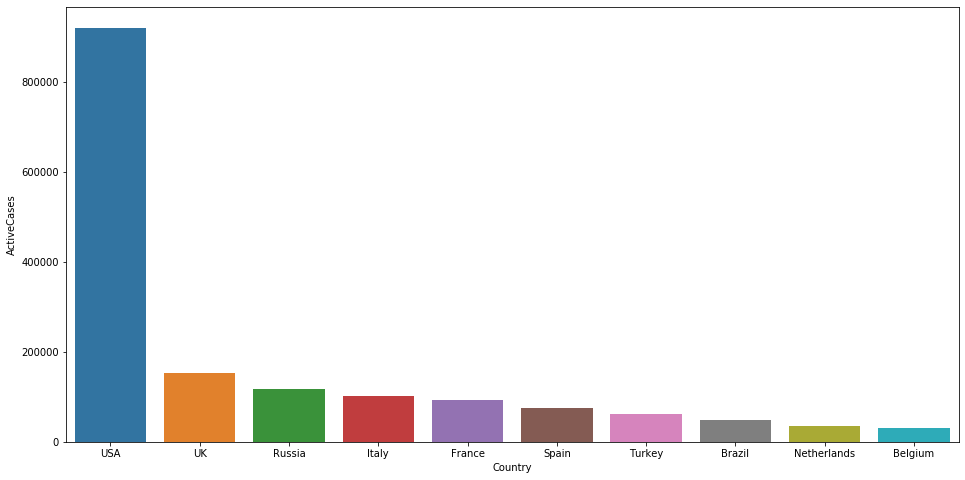

In [15]:
# sorting the  dataframe in the descending order according to the ActiveCases  
df_corona = df_corona.sort_values('ActiveCases', ascending=False)
sns.barplot(x=df_corona.Country[:10], y=df_corona.ActiveCases[:10])

## A barplot for the top 10 `Countries` and the `Total Recovered` cases in each country 

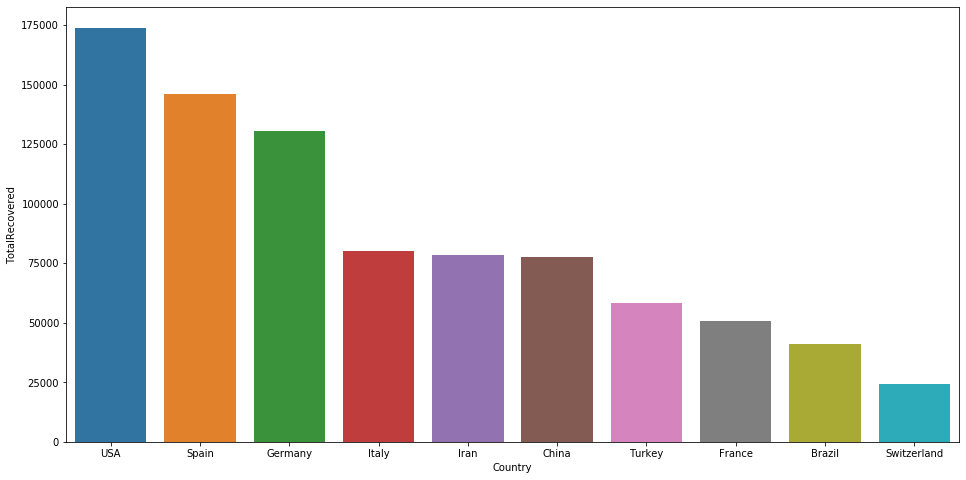

In [16]:
# sorting the  dataframe in the descending order according to the TotalRecovered  
df_corona = df_corona.sort_values('TotalRecovered', ascending=False)
sns.barplot(x=df_corona.Country[:10], y=df_corona.TotalRecovered[:10])

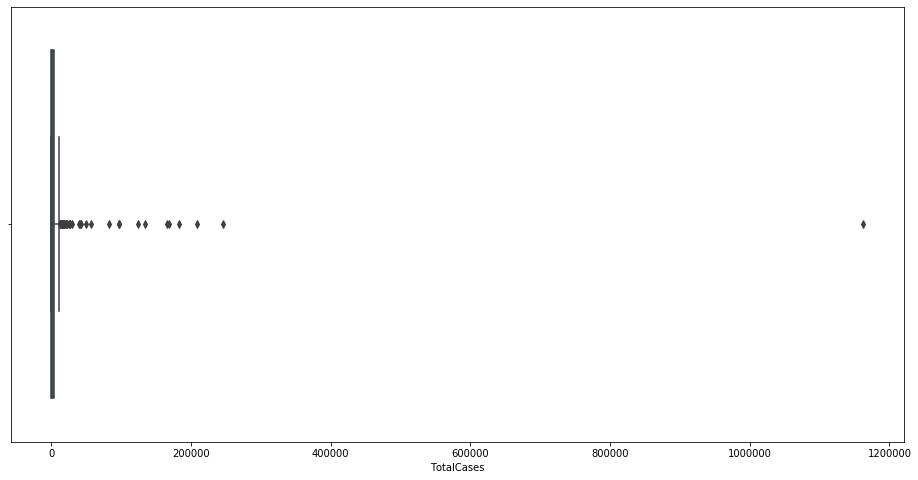

In [17]:
sns.boxplot(df_corona.TotalCases)

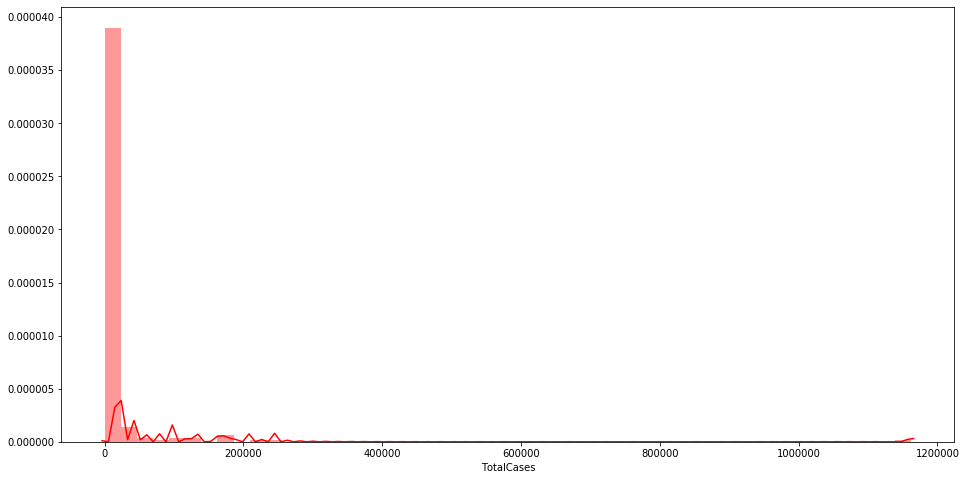

In [18]:
sns.distplot(df_corona.TotalCases, color='red')

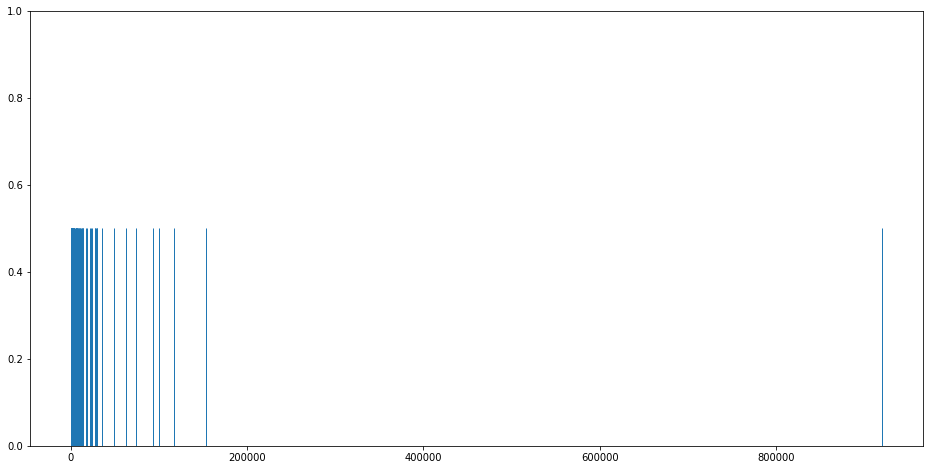

In [19]:
sns.rugplot(df_corona.ActiveCases, height=0.5)

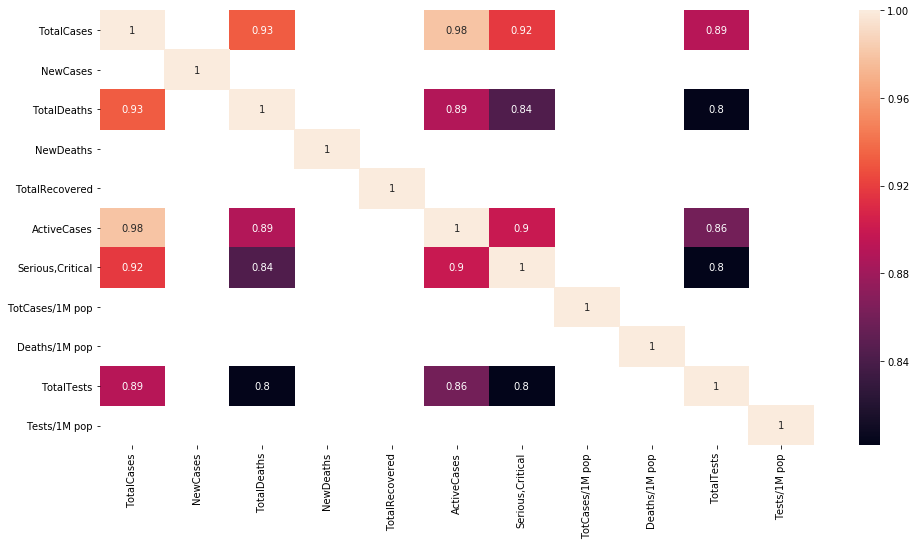

In [20]:
corrmat = df_corona.corr()
sns.heatmap(corrmat[corrmat>0.8], annot = True)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5           # Add 0.5 to the bottom
t -= 0.5           # Subtract 0.5 from the top
plt.ylim(b, t)     # update the ylim(bottom, top) values
plt.show() 

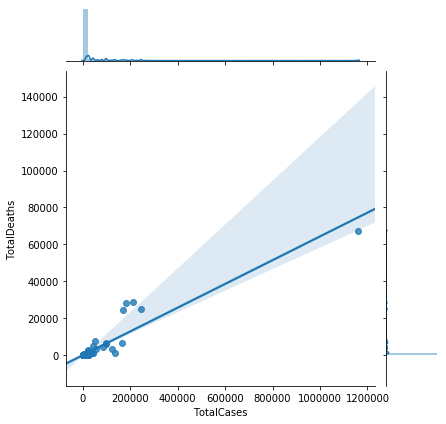

In [21]:
sns.jointplot(df_corona.TotalCases, df_corona.TotalDeaths, kind='reg')

In [22]:
# group the dataframe on the basis of Continents
group1 = df_corona.groupby('Continent')

In [23]:
# find the total cases for each continent
group1['TotalCases'].sum()

Continent
0                        721.0
Africa                 43909.0
Asia                  553336.0
Australia/Oceania       8390.0
Europe               1438691.0
North America        1261826.0
South America         200569.0
Name: TotalCases, dtype: float64

In [29]:
# find the average of each column for each continent
group1.agg(np.mean)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Continent,,,,,,,,,,,
0,360.500000,0.000000,7.500000,0.000000,322.500000,30.500000,2.000000,0.000000,0.000000,0.000000,0.000000
Africa,784.089286,3.125000,31.500000,0.017857,265.678571,486.910714,2.321429,110.428571,1.549464,13181.196429,1151.732143
Asia,11292.571429,153.591837,396.959184,2.285714,5858.122449,5037.489796,109.979592,489.495918,5.246327,176575.020408,13147.448980
Australia/Oceania,1398.333333,3.666667,19.166667,0.333333,1194.166667,185.000000,5.166667,144.150000,1.333333,132087.000000,13979.333333
Europe,29972.729167,298.479167,2910.687500,6.312500,11150.729167,15898.937500,364.000000,2641.291667,144.687500,353062.750000,31117.062500
North America,32354.512821,82.666667,1895.487179,3.692308,5525.358974,24933.666667,454.333333,556.871795,35.002564,206486.025641,6385.820513
South America,14326.357143,58.500000,732.785714,1.142857,4933.428571,8660.142857,704.428571,655.642857,14.171429,118978.214286,12046.142857


## What is this continent 0 and the value 721

In [24]:
df_corona[df_corona.Continent=='0']

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Continent
97,Diamond Princess,712.0,0.0,13.0,0.0,645.0,54.0,4.0,0.0,0.0,0.0,0.0,0
202,MS Zaandam,9.0,0.0,2.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0


In [25]:
# reading the csv file
df_corona_cont = pd.read_csv('covid_per_continent May-03-2020 18-58-05.csv')

In [26]:
df_corona_cont

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Continent
0,"1,261,826","+3,224","73,924",144.0,"215,489","972,413","17,719",North America
1,"1,438,691","+14,327","139,713",303.0,"535,829","763,149","17,472",Europe
2,"553,336","+7,526","19,451",112.0,"287,048","246,837","5,389",Asia
3,"200,569",+819,"10,259",16.0,"69,068","121,242","9,862",South America
4,"8,390",+22,115,2.0,"7,165","1,110",31,Australia/Oceania
5,"43,909",+175,"1,764",1.0,"14,878","27,267",130,Africa
